In [ ]:
"distribution of the response times and convert them into service times"

λ = 0.5, E[S] (Regular) = 1.0065, E[T] (Adversary) = 2.2804
λ = 0.6, E[S] (Regular) = 0.9921, E[T] (Adversary) = 2.1504
λ = 0.7, E[S] (Regular) = 1.0015, E[T] (Adversary) = 3.1884
λ = 0.8, E[S] (Regular) = 0.9945, E[T] (Adversary) = 9.4391
λ = 0.9, E[S] (Regular) = 1.0106, E[T] (Adversary) = 138.9947


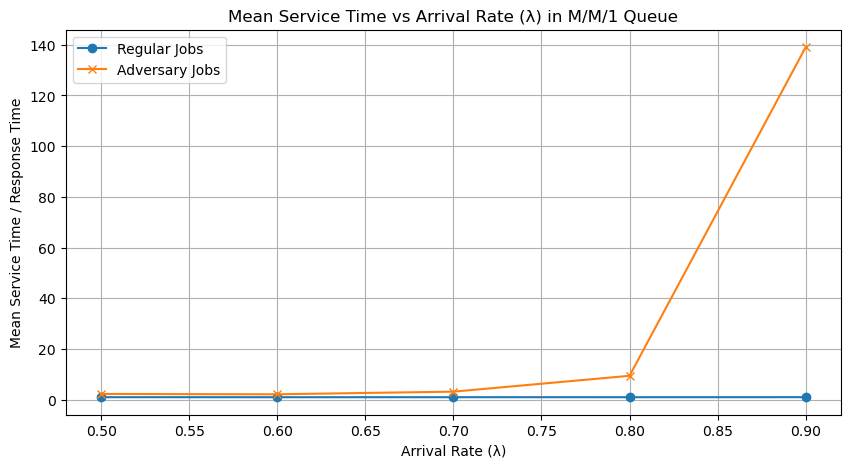

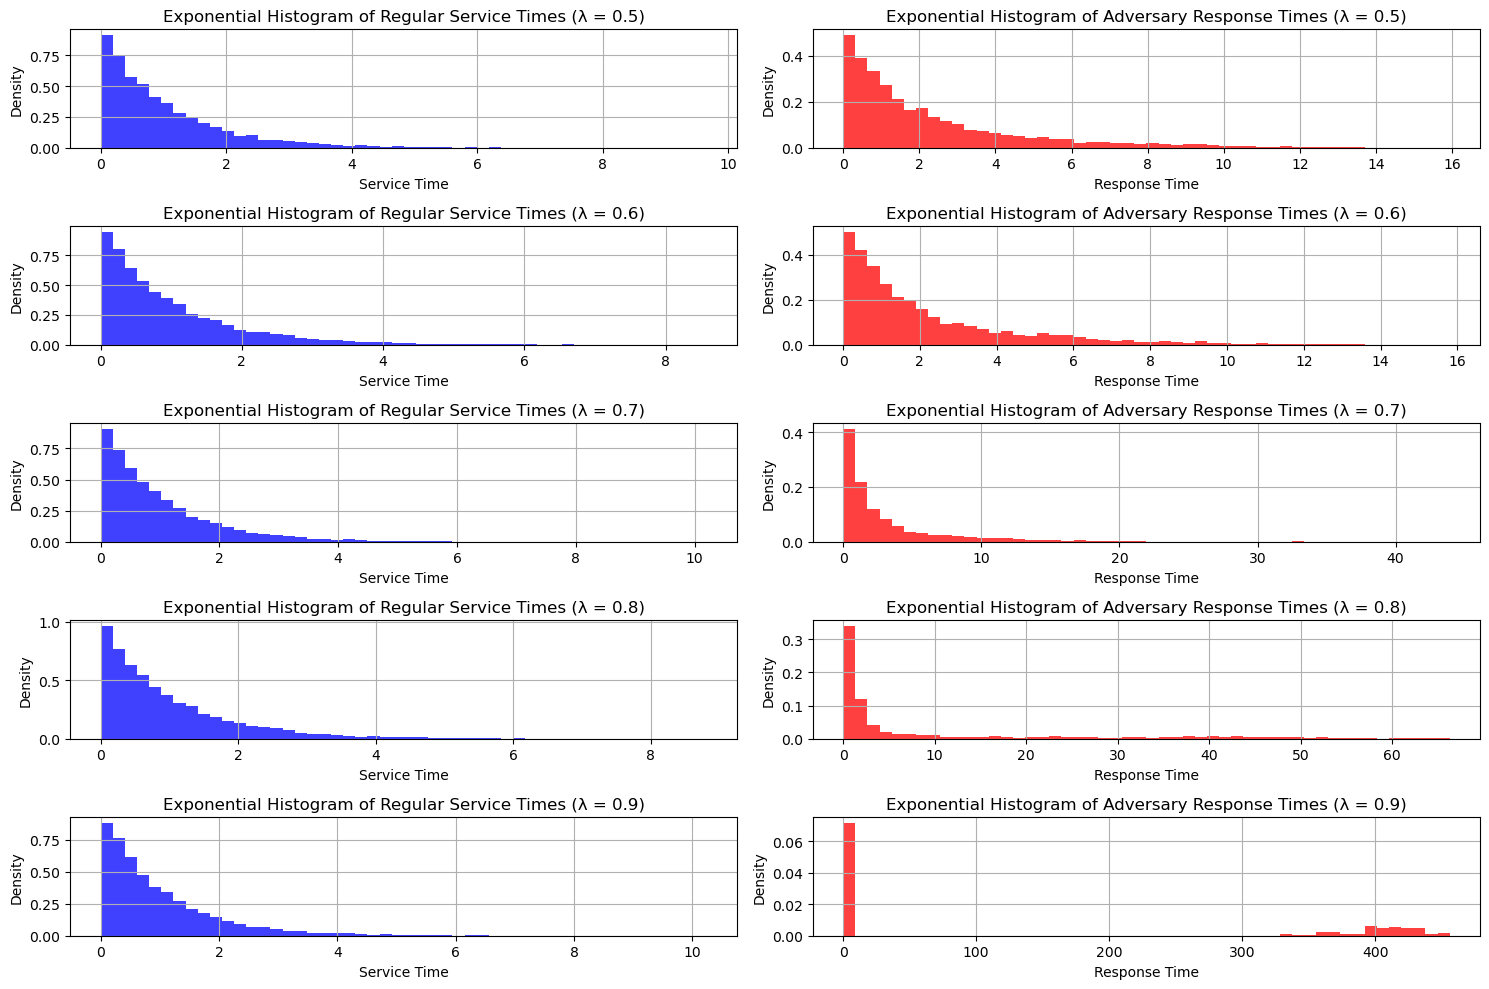

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    # Generate service times for regular jobs using an exponential distribution
    service_times = np.random.exponential(1, num_jobs)
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using an exponential distribution
        adv_service_times = np.random.exponential(1, adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate service times for regular jobs
    regular_service_times = service_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
        # Separate service times for adversary jobs (not used but kept for consistency)
        adv_service_times = service_times[num_jobs:]
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0
        adv_service_times = np.array([])

    # Calculate mean service time for regular jobs
    mean_service_time = np.mean(regular_service_times)
    
    return mean_service_time, mean_adv_response_time, regular_service_times, adv_response_times

def plot_mean_service_times(lambda_values, mean_service_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))
    plt.plot(lambda_values, mean_service_times, marker='o', label='Regular Jobs')
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')
    plt.xlabel('Arrival Rate (λ)')
    plt.ylabel('Mean Service Time / Response Time')
    plt.title('Mean Service Time vs Arrival Rate (λ) in M/M/1 Queue')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_service_histograms(lambda_values, all_regular_service_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_service_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs', density=True)  # Plot histogram of regular service times
        plt.xlabel('Service Time')  # Label the x-axis
        plt.ylabel('Density')  # Label the y-axis
        plt.title(f'Exponential Histogram of Regular Service Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs', density=True)  # Plot histogram of adversarial response times
            plt.xlabel('Response Time')  # Label the x-axis
            plt.ylabel('Density')  # Label the y-axis
            plt.title(f'Exponential Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]
mean_service_times = []
mean_adv_response_times = []
all_regular_service_times = []
all_adv_response_times = []

adv_lambda = 0.15
adv_num_jobs = 5000

for lambda_val in lambda_values:
    mean_service_time, mean_adv_response_time, regular_service_times, adv_response_times = simulate_mm1_queue(lambda_val, adv_lambda=adv_lambda, adv_num_jobs=adv_num_jobs)
    mean_service_times.append(mean_service_time)
    mean_adv_response_times.append(mean_adv_response_time)
    all_regular_service_times.append(regular_service_times)
    all_adv_response_times.append(adv_response_times)
    print(f"λ = {lambda_val}, E[S] (Regular) = {mean_service_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_service_times(lambda_values, mean_service_times, mean_adv_response_times)
plot_service_histograms(lambda_values, all_regular_service_times, all_adv_response_times)


λ = 0.5, E[T] (Regular) = 2.0976, E[T] (Adversary) = 1.7044
λ = 0.6, E[T] (Regular) = 2.8847, E[T] (Adversary) = 1.7511
λ = 0.7, E[T] (Regular) = 4.4429, E[T] (Adversary) = 2.3552
λ = 0.8, E[T] (Regular) = 11.1613, E[T] (Adversary) = 4.3748
λ = 0.9, E[T] (Regular) = 288.0712, E[T] (Adversary) = 207.2764


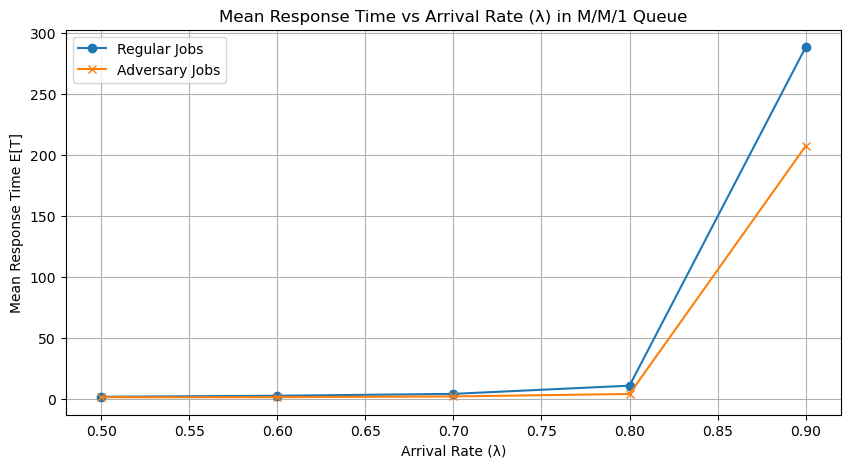

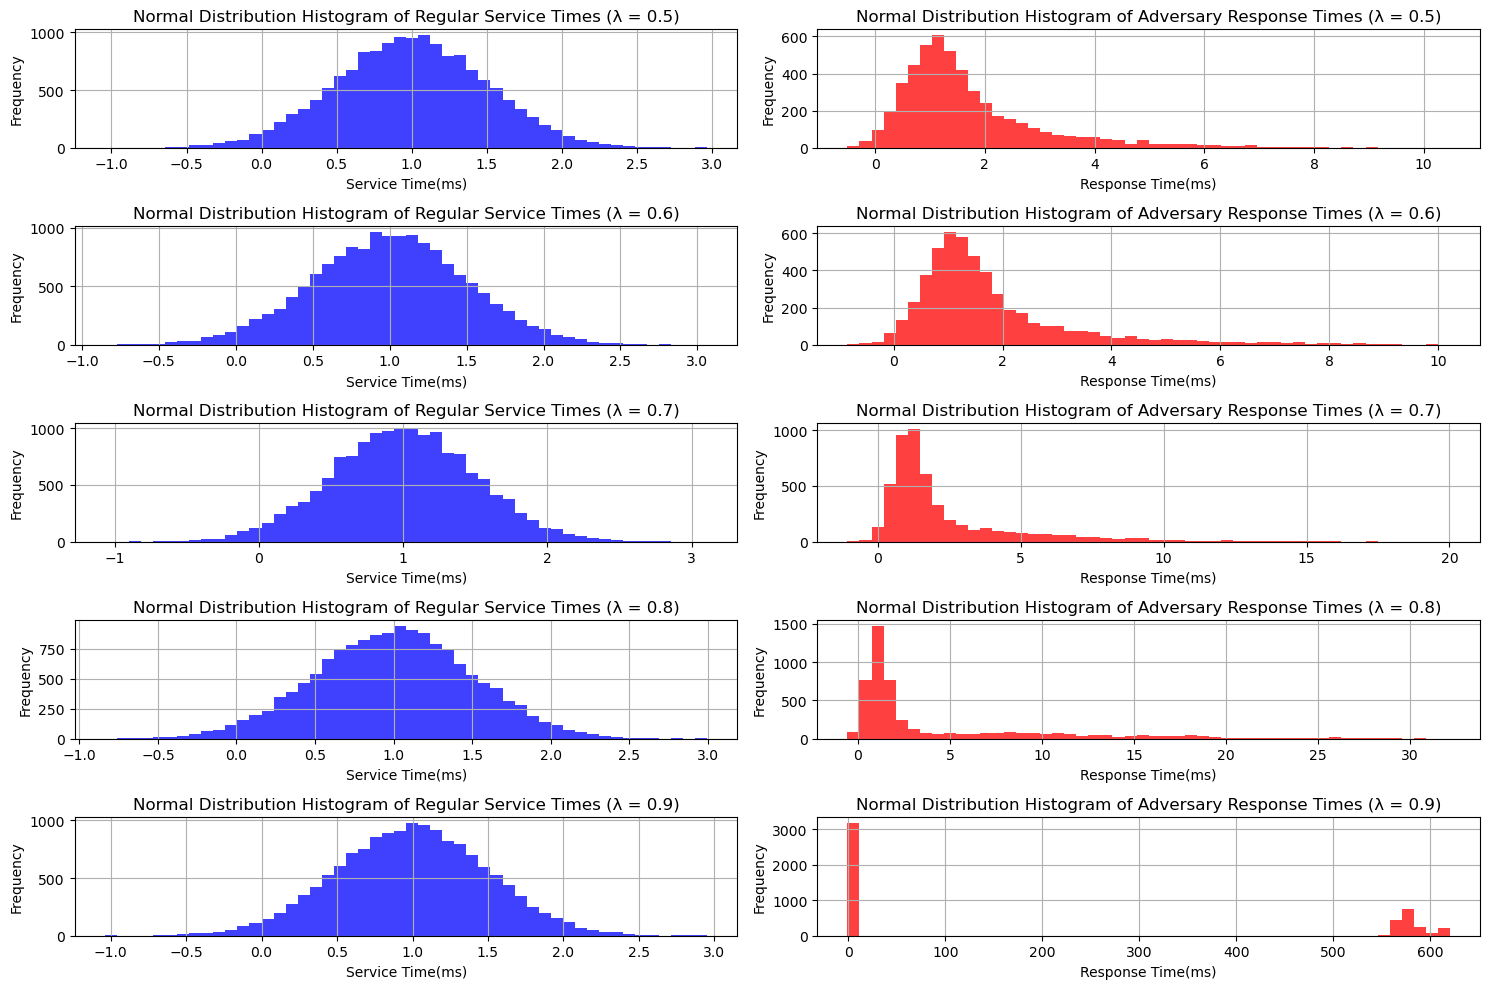

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0, service_mean=1.0, service_std=0.5):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    # Generate service times for regular jobs using a normal distribution
    service_times = np.random.normal(loc=service_mean, scale=service_std, size=num_jobs)
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using a normal distribution
        adv_service_times = np.random.normal(loc=service_mean, scale=service_std, size=adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times, service_times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_service_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_service_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular service times
        plt.xlabel('Service Time(ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Normal Distribution Histogram of Regular Service Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time(ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Normal Distribution Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_service_times = []  # Initialize an empty list to store all regular service times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 5000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times, service_times = simulate_mm1_queue(
        lambda_val,
        adv_lambda=adv_lambda,
        adv_num_jobs=adv_num_jobs,
        service_mean=1.0,
        service_std=0.5
    )
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_service_times.append(service_times)  # Append all regular service times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_service_times, all_adv_response_times)  # Plot histograms of service and response times


λ = 0.5, E[T] (Regular) = 1.3949, E[T] (Adversary) = 0.8838
λ = 0.6, E[T] (Regular) = 1.7374, E[T] (Adversary) = 0.9222
λ = 0.7, E[T] (Regular) = 2.2846, E[T] (Adversary) = 1.0407
λ = 0.8, E[T] (Regular) = 3.3481, E[T] (Adversary) = 1.3324
λ = 0.9, E[T] (Regular) = 6.4917, E[T] (Adversary) = 2.4000


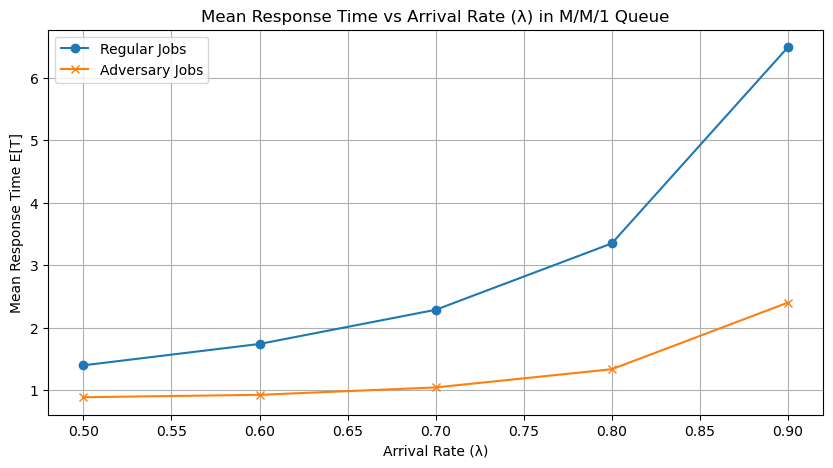

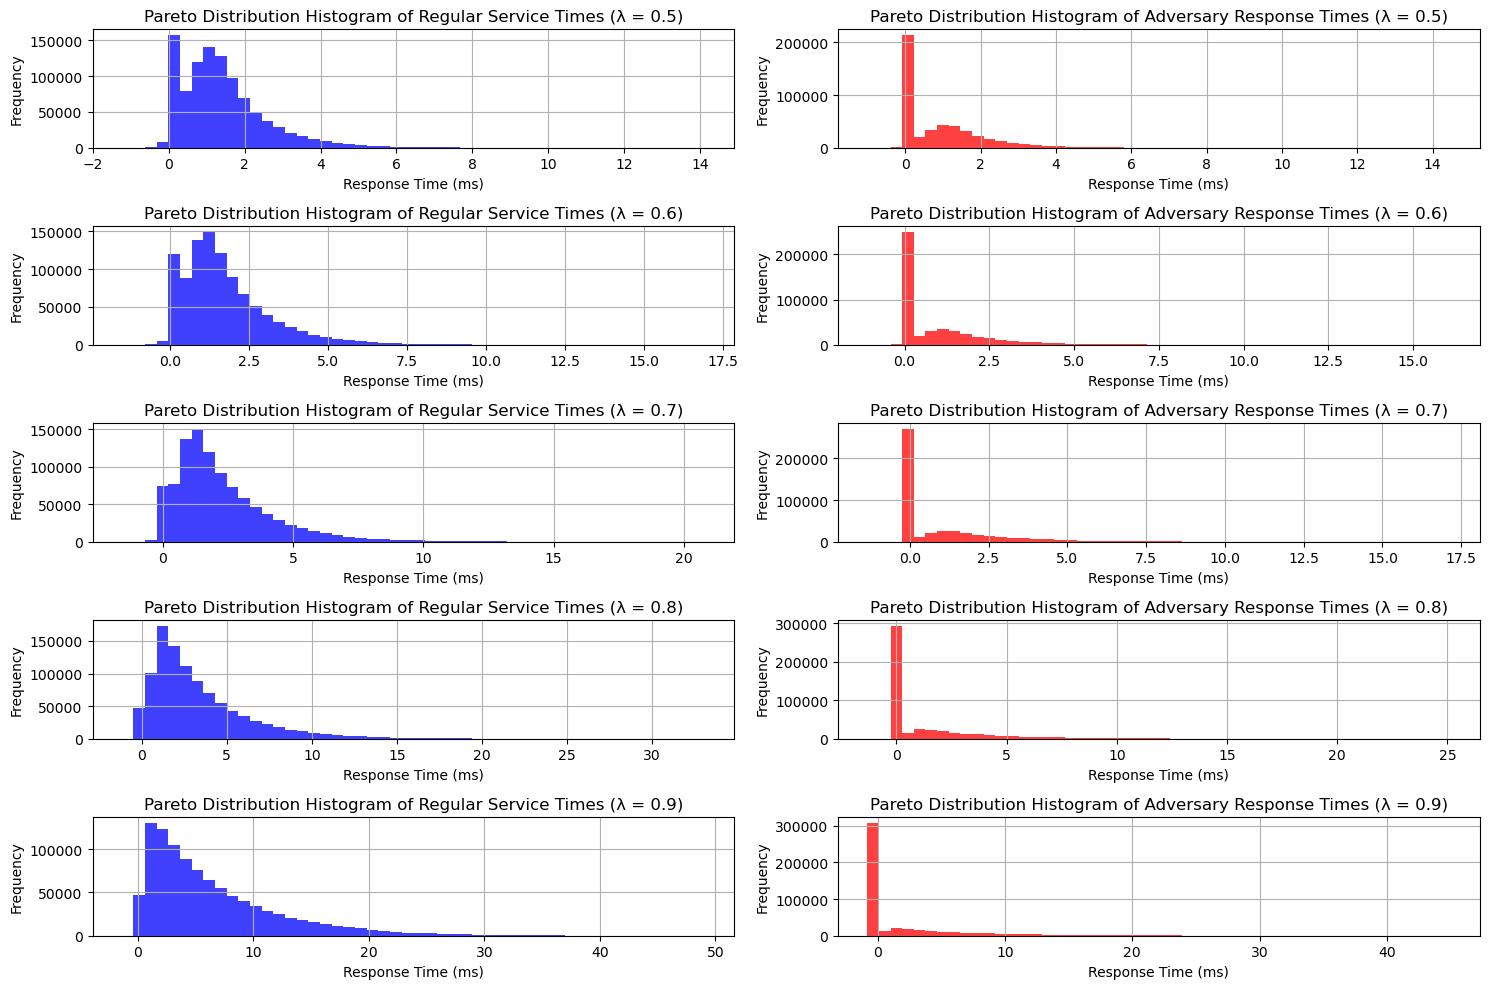

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=1000000, adv_lambda=None, adv_num_jobs=0, service_mean=1.0, service_std=0.5):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    
    # Generate service times for regular jobs using a normal distribution
    service_times = np.random.normal(loc=service_mean, scale=service_std, size=num_jobs)
    
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate response times for adversary jobs using a normal distribution
        adv_response_times = np.random.normal(loc=1.0, scale=0.5, size=adv_num_jobs)
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, np.zeros(adv_num_jobs)])  # Zero service time for adversary jobs

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_response_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_response_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular response times
        plt.xlabel('Response Time (ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Pareto Distribution Histogram of Regular Service Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time (ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Pareto Distribution Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_response_times = []  # Initialize an empty list to store all regular response times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 470000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times = simulate_mm1_queue(
        lambda_val,
        adv_lambda=adv_lambda,
        adv_num_jobs=adv_num_jobs,
        service_mean=1.0,
        service_std=0.5
    )
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_response_times.append(regular_response_times)  # Append all regular response times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times)  # Plot histograms of response times


λ = 0.5, E[T] (Regular) = 1.6288, E[T] (Adversary) = 1.4460
λ = 0.6, E[T] (Regular) = 2.0656, E[T] (Adversary) = 1.5128
λ = 0.7, E[T] (Regular) = 2.6517, E[T] (Adversary) = 1.5708
λ = 0.8, E[T] (Regular) = 4.5915, E[T] (Adversary) = 2.0823
λ = 0.9, E[T] (Regular) = 10.5567, E[T] (Adversary) = 3.7841


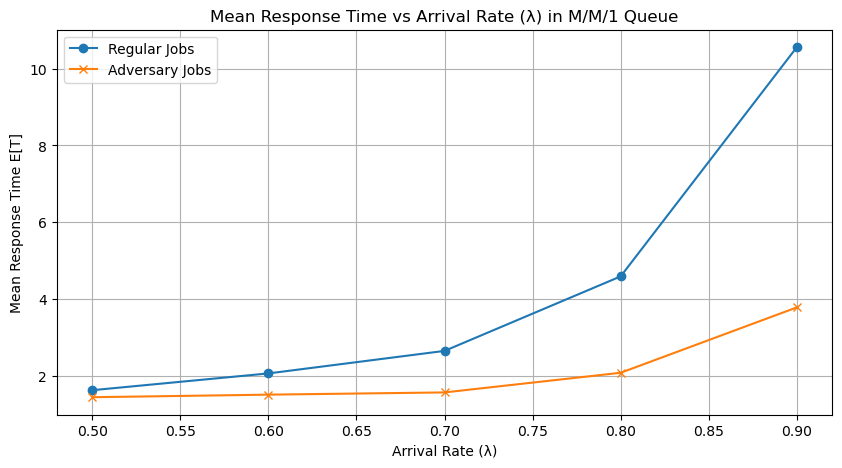

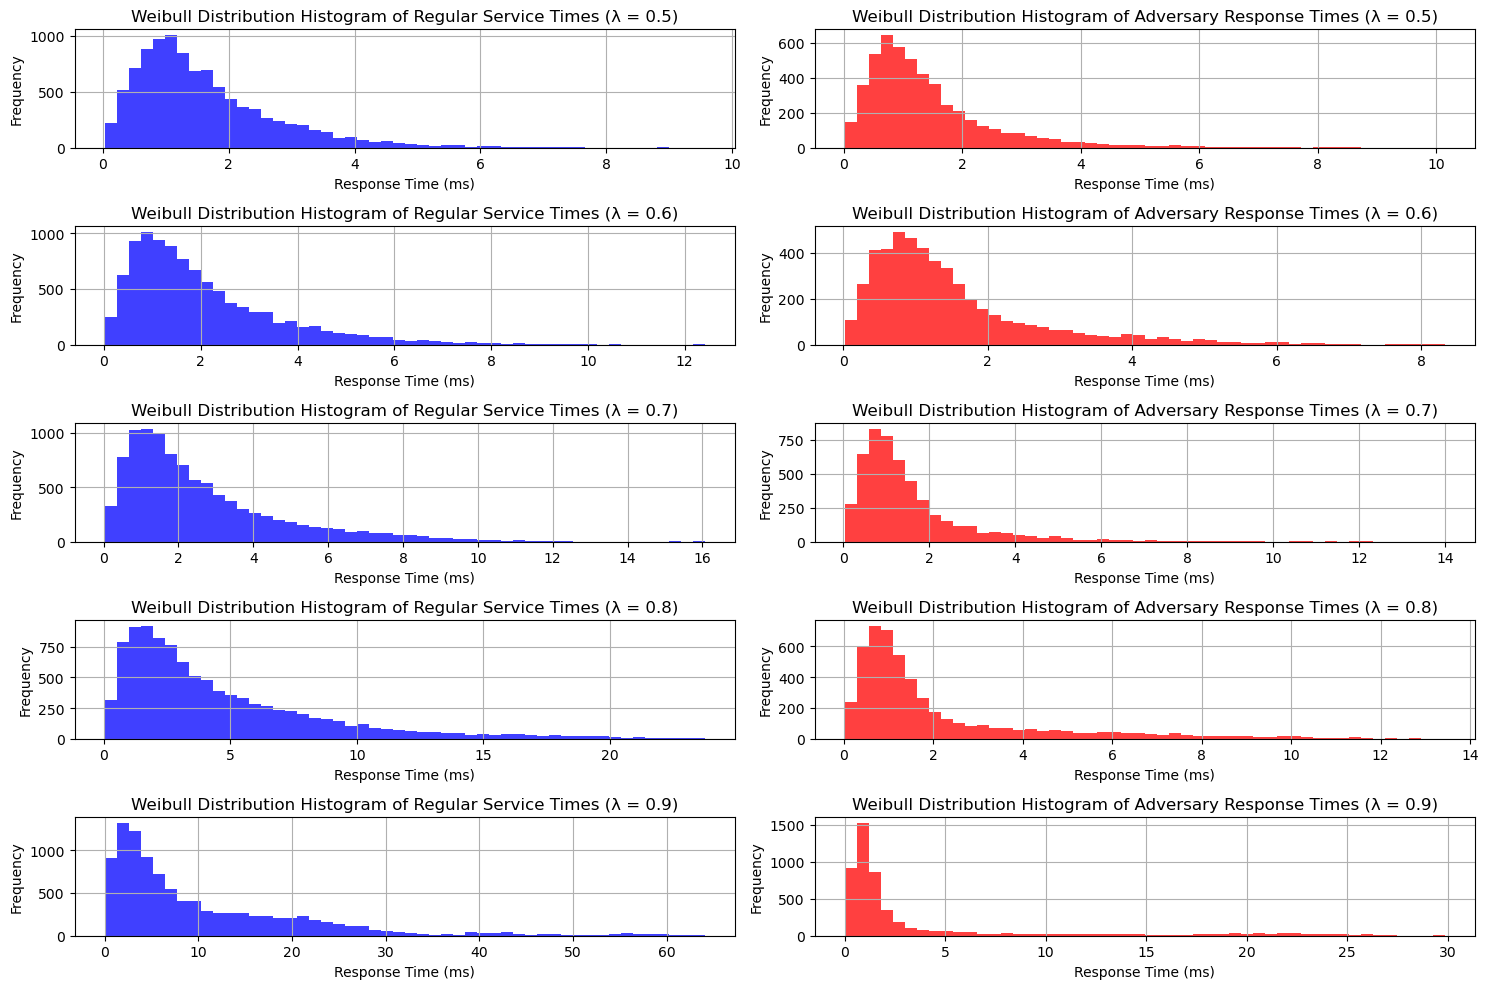

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(lambda_val, num_jobs=10000, adv_lambda=None, adv_num_jobs=0, shape=2.0):
    # Generate interarrival times for regular jobs using an exponential distribution
    interarrival_times = np.random.exponential(1 / lambda_val, num_jobs)
    
    # Generate service times for regular jobs using a Weibull distribution
    scale = 1.0  # Scale parameter for Weibull distribution to achieve mean 1
    service_times = np.random.weibull(shape, num_jobs) * scale
    
    # Calculate arrival times by cumulatively summing interarrival times
    arrival_times = np.cumsum(interarrival_times)

    if adv_lambda is not None and adv_num_jobs > 0:
        # Generate interarrival times for adversary jobs using an exponential distribution
        adv_interarrival_times = np.random.exponential(1 / adv_lambda, adv_num_jobs)
        # Generate service times for adversary jobs using a Weibull distribution
        adv_service_times = np.random.weibull(shape, adv_num_jobs) * scale
        # Calculate arrival times for adversary jobs by cumulatively summing interarrival times
        adv_arrival_times = np.cumsum(adv_interarrival_times)

        # Combine arrival times of regular and adversary jobs
        combined_arrival_times = np.concatenate([arrival_times, adv_arrival_times])
        # Combine service times of regular and adversary jobs
        combined_service_times = np.concatenate([service_times, adv_service_times])

        # Sort jobs by arrival times
        sorted_indices = np.argsort(combined_arrival_times)
        # Update arrival times and service times based on sorted indices
        arrival_times = combined_arrival_times[sorted_indices]
        service_times = combined_service_times[sorted_indices]
    else:
        # If no adversary jobs, initialize empty arrays for adversary times
        adv_arrival_times = np.array([])
        adv_service_times = np.array([])

    # Initialize start service times array
    start_service_times = np.zeros(len(arrival_times))
    # Initialize departure times array
    departure_times = np.zeros(len(arrival_times))
    # Initialize response times array
    response_times = np.zeros(len(arrival_times))

    # Simulate the queue process
    for i in range(len(arrival_times)):
        if i == 0:
            # First job starts service at its arrival time
            start_service_times[i] = arrival_times[i]
        else:
            # Subsequent jobs start service at the maximum of their arrival time or the previous job's departure time
            start_service_times[i] = max(arrival_times[i], departure_times[i - 1])
        # Departure time is start service time plus service time
        departure_times[i] = start_service_times[i] + service_times[i]
        # Response time is departure time minus arrival time
        response_times[i] = departure_times[i] - arrival_times[i]

    # Separate response times for regular jobs
    regular_response_times = response_times[:num_jobs]
    if adv_lambda is not None and adv_num_jobs > 0:
        # Separate response times for adversary jobs
        adv_response_times = response_times[num_jobs:]
        # Calculate mean response time for adversary jobs
        mean_adv_response_time = np.mean(adv_response_times)
    else:
        # No adversary jobs mean response time is 0
        adv_response_times = np.array([])
        mean_adv_response_time = 0

    # Calculate mean response time for regular jobs
    mean_response_time = np.mean(regular_response_times)
    
    return mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times

def plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times):
    plt.figure(figsize=(10, 5))  # Create a new figure for plotting with specified size
    plt.plot(lambda_values, mean_response_times, marker='o', label='Regular Jobs')  # Plot regular job response times
    if mean_adv_response_times:
        plt.plot(lambda_values, mean_adv_response_times, marker='x', label='Adversary Jobs')  # Plot adversary job response times
    plt.xlabel('Arrival Rate (λ)')  # Label the x-axis
    plt.ylabel('Mean Response Time E[T]')  # Label the y-axis
    plt.title('Mean Response Time vs Arrival Rate (λ) in M/M/1 Queue')  # Add a title to the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Enable grid lines for better readability
    plt.show()  # Display the plot

def plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times):
    plt.figure(figsize=(15, 10))  # Create a new figure for plotting histograms
    for i, lambda_val in enumerate(lambda_values):
        plt.subplot(len(lambda_values), 2, 2*i + 1)  # Create a subplot for each lambda value for regular jobs
        plt.hist(all_regular_response_times[i], bins=50, alpha=0.75, color='blue', label='Regular Jobs')  # Plot histogram of regular response times
        plt.xlabel('Response Time (ms)')  # Label the x-axis
        plt.ylabel('Frequency')  # Label the y-axis
        plt.title(f'Weibull Distribution Histogram of Regular Service Times (λ = {lambda_val})')  # Add a title to the subplot
        plt.grid(True)  # Enable grid lines for better readability

        if all_adv_response_times[i].size > 0:
            plt.subplot(len(lambda_values), 2, 2*i + 2)  # Create a subplot for each lambda value for adversary jobs
            plt.hist(all_adv_response_times[i], bins=50, alpha=0.75, color='red', label='Adversary Jobs')  # Plot histogram of adversarial response times
            plt.xlabel('Response Time (ms)')  # Label the x-axis
            plt.ylabel('Frequency')  # Label the y-axis
            plt.title(f'Weibull Distribution Histogram of Adversary Response Times (λ = {lambda_val})')  # Add a title to the subplot
            plt.grid(True)  # Enable grid lines for better readability
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()  # Display the plot

lambda_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Define the different lambda values for the simulation
mean_response_times = []  # Initialize an empty list to store the mean response times for regular jobs
mean_adv_response_times = []  # Initialize an empty list to store the mean response times for adversary jobs
all_regular_response_times = []  # Initialize an empty list to store all regular response times
all_adv_response_times = []  # Initialize an empty list to store all adversary response times

adv_lambda = 0.15  # Define adversary arrival rate
adv_num_jobs = 5000  # Define number of adversary jobs

# Loop over each lambda value to perform the simulation and calculate mean response times
for lambda_val in lambda_values:
    mean_response_time, mean_adv_response_time, regular_response_times, adv_response_times = simulate_mm1_queue(
        lambda_val,
        adv_lambda=adv_lambda,
        adv_num_jobs=adv_num_jobs,
        shape=2.0
    )
    mean_response_times.append(mean_response_time)  # Append mean response time for regular jobs
    mean_adv_response_times.append(mean_adv_response_time)  # Append mean response time for adversary jobs
    all_regular_response_times.append(regular_response_times)  # Append all regular response times
    all_adv_response_times.append(adv_response_times)  # Append all adversarial response times
    print(f"λ = {lambda_val}, E[T] (Regular) = {mean_response_time:.4f}, E[T] (Adversary) = {mean_adv_response_time:.4f}")

# Plot the results
plot_mean_response_times(lambda_values, mean_response_times, mean_adv_response_times)  # Plot the mean response times
plot_response_histograms(lambda_values, all_regular_response_times, all_adv_response_times)  # Plot histograms of response times
